ZAMAN SERİSİ İLE DENEME 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [26]:
# Veriyi pandas ile alıyorum.
aapl = pd.read_csv(r'C:\Users\naife\OneDrive\Masaüstü\AAPL(80-24).CSV', delimiter=',')
print(aapl.head())

         Date  Price  Open  High   Low     Vol. Change %
0  12/12/1980   0.13  0.13  0.13  0.13  469.03M  -99.88%
1  12/15/1980   0.12  0.12  0.12  0.12  175.88M   -7.69%
2  12/16/1980   0.11  0.11  0.11  0.11  105.73M   -8.33%
3  12/17/1980   0.12  0.12  0.12  0.12   86.44M    9.09%
4  12/18/1980   0.12  0.12  0.12  0.12   73.45M    0.00%


In [27]:
# Eksik veri var mı kontrol ediyorum.
eksik_degerler = aapl.isnull()
print("Eksik Değerler:\n", eksik_degerler)

Eksik Değerler:
         Date  Price   Open   High    Low   Vol.  Change %
0      False  False  False  False  False  False     False
1      False  False  False  False  False  False     False
2      False  False  False  False  False  False     False
3      False  False  False  False  False  False     False
4      False  False  False  False  False  False     False
...      ...    ...    ...    ...    ...    ...       ...
10907  False  False  False  False  False  False     False
10908  False  False  False  False  False  False     False
10909  False  False  False  False  False  False     False
10910  False  False  False  False  False  False     False
10911  False  False  False  False  False  False     False

[10912 rows x 7 columns]


In [29]:
# Ortalama almak için 2000 yılının verilerini buldum
secilen_veriler = aapl[aapl['Date'].str.contains('/2000')]

# Seçilen verileri görüntüleyin
print(secilen_veriler)

# secilen_veriler DataFrame'inizdeki 'Price' sütununun ortalamasını alın
ortalama_price = secilen_veriler['Price'].mean()
ortalama_open = secilen_veriler['Open'].mean()
ortalama_high = secilen_veriler['High'].mean()
ortalama_low = secilen_veriler['Low'].mean()

# Ortalama fiyatı yazdırın
print("Ortalama Price:", ortalama_price)
print("Ortalama open:", ortalama_open)
print("Ortalama high:", ortalama_high)
print("Ortalama low:", ortalama_low)

            Date  Price  Open  High   Low     Vol. Change %
4816  01/03/2000   1.00  0.94  1.00  0.91  535.82M    8.70%
4817  01/04/2000   0.92  0.97  0.99  0.90  511.73M   -8.00%
4818  01/05/2000   0.93  0.93  0.99  0.92  778.32M    1.09%
4819  01/06/2000   0.85  0.95  0.96  0.85  767.98M   -8.60%
4820  01/07/2000   0.89  0.86  0.90  0.85  460.73M    4.71%
...          ...    ...   ...   ...   ...      ...      ...
5062  12/22/2000   0.27  0.25  0.27  0.25  318.10M    8.00%
5063  12/26/2000   0.26  0.27  0.27  0.25  216.82M   -3.70%
5064  12/27/2000   0.26  0.26  0.26  0.25  325.47M    0.00%
5065  12/28/2000   0.26  0.26  0.27  0.26  305.18M    0.00%
5066  12/29/2000   0.27  0.26  0.27  0.26  631.10M    3.85%

[251 rows x 7 columns]
Ortalama Price: 0.8156972111553785
Ortalama open: 0.8174103585657371
Ortalama high: 0.8435458167330678
Ortalama low: 0.7922709163346614


In [46]:
# Dizini sıfırladım, yani index değerleri atadım.
aapl.reset_index(inplace=True)
print(aapl)


       index        Date   Price    Open    High     Low     Vol. Change %
0          0  12/12/1980    0.13    0.13    0.13    0.13  469.03M  -99.88%
1          1  12/15/1980    0.12    0.12    0.12    0.12  175.88M   -7.69%
2          2  12/16/1980    0.11    0.11    0.11    0.11  105.73M   -8.33%
3          3  12/17/1980    0.12    0.12    0.12    0.12   86.44M    9.09%
4          4  12/18/1980    0.12    0.12    0.12    0.12   73.45M    0.00%
...      ...         ...     ...     ...     ...     ...      ...      ...
10907  10907  03/21/2024  171.37  177.05  177.49  170.84  106.18M   -4.09%
10908  10908  03/22/2024  172.28  171.76  173.05  170.06   71.16M    0.53%
10909  10909  03/25/2024  170.85  170.37  171.94  169.46   54.21M   -0.83%
10910  10910  03/26/2024  169.71  170.01  171.41  169.65   57.22M   -0.67%
10911  10911  03/27/2024  173.31  170.30  173.58  170.14   59.11M    2.12%

[10912 rows x 8 columns]


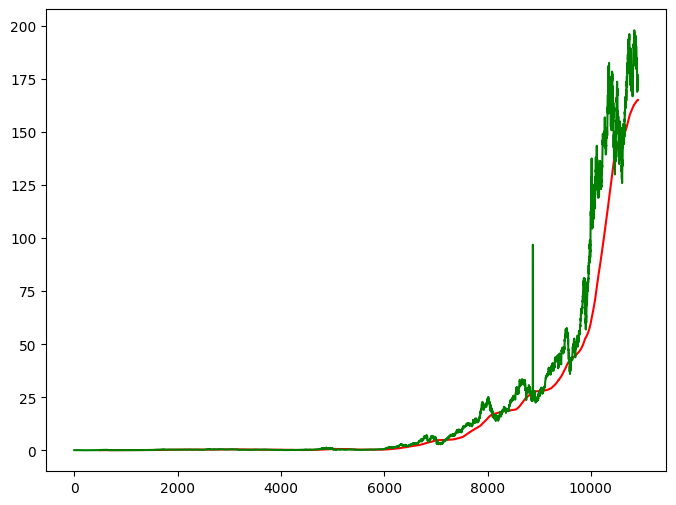

In [47]:
# 100 günlük hareketli ortalamanın grafiğini çizdirdim.
ma_500_days = aapl.Open.rolling(500).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_500_days, 'r')
plt.plot(aapl.Open, 'g')
plt.show()

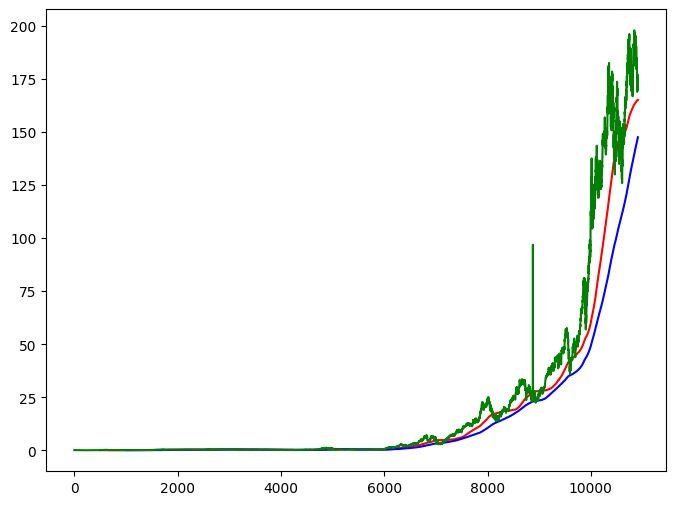

In [48]:
# Son 200 günün hareketli ortalamasının grafiğini çizdiridm.
ma__1000_days = aapl.Open.rolling(1000).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_500_days, 'r')
plt.plot(ma__1000_days, 'b')
plt.plot(aapl.Open, 'g')
plt.show()

In [49]:
# Verilerimi eğitim ve test verisi olarak ikiye ayırdım
aapl_train = pd.DataFrame(aapl.Open[0: int(len(aapl)*0.80)])
aapl_test = pd.DataFrame(aapl.Open[int(len(aapl)*0.80):len(aapl)])

In [50]:
#eğitim
print(aapl_train.shape[0])

#test
print(aapl_test.shape[0])

8729
2183


In [51]:
print(aapl_train.head())
print(aapl_train.index)



   Open
0  0.13
1  0.12
2  0.11
3  0.12
4  0.12
RangeIndex(start=0, stop=8729, step=1)


In [52]:
# Verilerimi (0,1) aralığında ölçeklendirdim. Min-max normalizasyon kullandım.
scaler = MinMaxScaler(feature_range=(0,1))
aapl_train_scale = scaler.fit_transform(aapl_train)

In [43]:
"""# Zaman serisi verilerinin sıralı bir şekilde işlenmesinde kullanılır.
x = []
y = []

for i in range(100, aapl_train_scale.shape[0]):
    x.append(aapl_train_scale[i-100:i, 0])  # Önceki 100 günlük veri dilimi
    y.append(aapl_train_scale[i, 0])         # Sonraki günün verisi
x, y = np.array(x), np.array(y)"""

'# Zaman serisi verilerinin sıralı bir şekilde işlenmesinde kullanılır.\nx = []\ny = []\n\nfor i in range(100, aapl_train_scale.shape[0]):\n    x.append(aapl_train_scale[i-100:i, 0])  # Önceki 100 günlük veri dilimi\n    y.append(aapl_train_scale[i, 0])         # Sonraki günün verisi\nx, y = np.array(x), np.array(y)'

In [53]:
# 'Date' sütununu indeks olarak ayarla
aapl_train.set_index('Date', inplace=True)

# Verileri önceden işlediğiniz kısım
x = []
y = []

for i in range(100, aapl_train_scale.shape[0]):
    # Önceki 100 günlük fiyat verileri
    x_data = aapl_train_scale[i-100:i, 0]
    # Tarih bilgisi, 100 günlük fiyat verilerinden bir önceki günün tarihi
    date = aapl_train.index[i-1]
    # Tarih bilgisini veri dilimine ekleme
    x_data_with_date = np.append(x_data, date)
    # x listesine veri dilimini ekleme
    x.append(x_data_with_date)



KeyError: "None of ['Date'] are in the columns"

In [16]:
# Verileri yeniden şekillendirme
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [17]:
# Model oluşturma
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120))
model.add(Dropout(0.5))
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mse')

# Modeli eğitme
model.fit(x, y, epochs=30, batch_size=35, verbose=1)

c:\Users\naife\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 36s 121ms/step - loss: 0.0061
Epoch 2/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - loss: 0.0011
Epoch 3/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 36s 146ms/step - loss: 0.0015
Epoch 4/30
175/247 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 9.4398e-04

KeyboardInterrupt: 

In [ ]:
# Modelin özetini görüntüleme
model.summary()

In [ ]:
# Test verisi ile eğitim verisini birleştirme
aapl_test = pd.concat([aapl_train.tail(500), aapl_test], ignore_index=True)

In [ ]:
# Test verisini ölçeklendirme
aapl_test_scale = scaler.fit_transform(aapl_test)

In [ ]:
# Test verisi için x ve y oluşturma
x_test = []
y_test = []

for i in range(100, aapl_test_scale.shape[0]):
    x_test.append(aapl_test_scale[i-100:i, 0])
    y_test.append(aapl_test_scale[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
# Verileri yeniden şekillendirme
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Tahmin yapma
y_predict = model.predict(x_test)

In [ ]:
# Tahminleri ters ölçekleme
y_predict = scaler.inverse_transform(y_predict)
y_test = scaler.inverse_transform([y_test])

In [ ]:
# Tahminleri ve gerçek değerleri görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(y_predict, 'r', label='Tahmin Edilen Fiyat')
plt.plot(y_test[0], 'g', label='Gerçek Fiyat')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

In [ ]:
# Hata hesaplama
mse = mean_squared_error(y_test[0], y_predict)
print("Mean Squared Error (MSE):", mse)